<a href="https://colab.research.google.com/github/886814/Fairy-Tale/blob/main/Generate_novel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install streamlit
!pip install fastai==2.2.5

     |████████████████████████████████| 4.0 MB 28.7 MB/s 
     |████████████████████████████████| 77 kB 8.6 MB/s 
     |████████████████████████████████| 596 kB 54.0 MB/s 
     |████████████████████████████████| 6.6 MB 61.5 MB/s 
     |████████████████████████████████| 880 kB 8.2 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=7937b870c8b8fdd3d05236baf015c968d9408554398ac1f111af3b81d87a69cd
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 10.1 MB 31.4 MB/s 
     |████████████████████████████████| 164 kB 69.6 MB/s 
     |████████████████████████████████| 4.3 MB 59.1 MB/s 
     |████████████████████████████████| 181 kB 73.6 MB/s 
     |████████████████████████████

     |████████████████████████████████| 191 kB 35.8 MB/s 
     |████████████████████████████████| 776.8 MB 18 kB/s 
     |████████████████████████████████| 55 kB 5.0 MB/s 
     |████████████████████████████████| 12.8 MB 8.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.7.1 which is inc

In [ ]:
from typing import Optional
import torch
import transformers
from transformers import AutoModelWithLMHead, PreTrainedTokenizerFast, GPT2LMHeadModel
from fastai.text.all import *
import fastai
import re
import string
import streamlit as st

In [ ]:
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
  bos_token='</s>', eos_token='</s>', unk_token='<unk>',
  pad_token='<pad>', mask_token='<mask>') 
model = AutoModelWithLMHead.from_pretrained("skt/kogpt2-base-v2")
text = """ 옛날 옛날 어느 마을에 흥부와 놀부 형제가 """
input_ids = tokenizer.encode(text)
gen_ids = model.generate(torch.tensor([input_ids]),
                           max_length=128,
                           repetition_penalty=2.0,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           use_cache=True
                        )
generated = tokenizer.decode(gen_ids[0,:].tolist())
print(generated)

Downloading:   0%|          | 0.00/2.69M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:911: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/490M [00:00<?, ?B/s]

옛날 옛날 어느 마을에 흥부와 놀부 형제가 왁자지껄 떠들어대며 "우리 집엔 왜 이렇게 많은 사람들이 모여 사는 거야?" 하고 묻는다.
그런데 그 마을 사람들은 모두 다들 자기네 동네에 살고 있는 사람들이라고 한다.
이렇게 해서 우리 마을은 '흥부가 살던 곳'이라는 뜻의 '고향'이 되었다.
그리고 이 고향은 바로 지금의 서울 종로구 숭인동이다.
숭인동은 원래 종로에서 가장 오래된 주택가였다.
1970년대까지만 해도 이곳은 재개발로 인해 헐리고 빈집이 많아졌다.
하지만 1980년대 들어 다시 활기를 되찾기 시작했다.
당시만 하더라도 이곳에는 낡은 건물들이 많이 남아 있었다.
그러나 1990년대 들어서부터는 예전의


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/FairyTale.txt') as f:
   lines = f.read()
lines=" ".join(lines.split())

#model input output tokenizer
class TransformersTokenizer(Transform):
   def __init__(self, tokenizer): self.tokenizer = tokenizer
   def encodes(self, x): 
       toks = self.tokenizer.tokenize(x)
       return tensor(self.tokenizer.convert_tokens_to_ids(toks))
   def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

#split data
train=lines[:int(len(lines)*0.9)]
test=lines[int(len(lines)*0.9):]
splits = [[0],[1]]

#init dataloader
tls = TfmdLists([train,test], TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
batch,seq_len = 8,256
dls = tls.dataloaders(bs=batch, seq_len=seq_len)

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.10000000149011612)


epoch,train_loss,valid_loss,perplexity,time
0,6.650977,7.288830,1463.856689,00:23


epoch,train_loss,valid_loss,perplexity,time
0,6.786952,6.732291,839.067139,00:23
1,6.230096,6.251085,518.575317,00:23
2,5.694181,6.084551,439.022583,00:24
3,5.241504,5.954678,385.552582,00:24
4,4.838744,5.958637,387.082275,00:24
5,4.627804,5.866416,352.981628,00:24


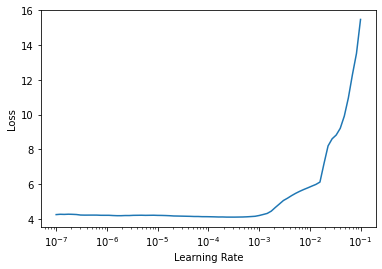

In [ ]:
#gpt2 ouput is tuple, we need just one val
class DropOutput(Callback):
  def after_pred(self): self.learn.pred = self.pred[0]
      
      
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()
lr=learn.lr_find()
print(lr)
learn.fine_tune(6)

In [ ]:
prompt=" 옛날 옛날 어느 마을에 한수연이 살고있었어요."
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
preds = learn.model.generate(inp,
                           max_length=128,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           repetition_penalty=2.0,       
                           use_cache=True
                          )
tokenizer.decode(preds[0].cpu().numpy())

'옛날 옛날 어느 마을에 한수연이 살고있었어요. “내 너를 찾아다요?”라며 소녀가 말했지 뭐예요.” “그럼 내 아들이 대답해주세요,”라고 물으론 안 돼, 저희들이 그걸 알아.” “아니?” 그러자 아빠에게 가버렸죠. 하지만 그녀가 다시 돌아와서 이게 해봐요.”라고 귀여운 마녀가 소리쳤답니다. 그래서 왕이 그녀에게 말을 타고 갔거든!” 그러면서 그녀와 함께 길을 알려주시면 더 이상 걸어가야 했더냐? 난쟁이들은 자신의 부모님도 하지 않았다. 그리고 그녀는 그녀를 데리고 가는 게 보니, 엄마'

In [ ]:
@st.cache(allow_output_mutation=True)
def get_model():
    model = GPT2LMHeadModel.from_pretrained('skt/kogpt2-base-v2')
    model.eval()
    return model

tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
                                                    bos_token='</s>',
                                                    eos_token='</s>',
                                                    unk_token='<unk>',
                                                    pad_token='<pad>',
                                                    mask_token='<mask>')


default_text = "현대인들은 왜 항상 불안해 할까?"

N_SENT = 3

model = get_model()
st.title("KoGPT2 Demo Page(ver 2.0)")

st.markdown("""
### 모델
| Model       |  # of params |   Type   | # of layers  | # of heads | ffn_dim | hidden_dims | 
|--------------|:----:|:-------:|--------:|--------:|--------:|--------------:|
| `KoGPT2` |  125M  |  Decoder |   12     | 12      | 3072    | 768 | 
### 샘플링 방법
- greedy sampling
- 최대 출력 길이 : 128/1,024
## Conditional Generation
""")

text = st.text_area("Input Text:", value=default_text)
st.write(text)
punct = ('!', '?', '.')

if text:
    st.markdown("## Predict")
    with st.spinner('processing..'):
        print(f'input > {text}') 
        input_ids = tokenizer(text)['input_ids']
        gen_ids = model.generate(torch.tensor([input_ids]),
                                    max_length=128,
                                    repetition_penalty=2.0)
        generated = tokenizer.decode(gen_ids[0,:].tolist()).strip()
        if generated != '' and generated[-1] not in punct:
            for i in reversed(range(len(generated))):
                if generated[i] in punct:
                    break
            generated = generated[:(i+1)]
        print(f'KoGPT > {generated}')
    st.write(generated)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
2022-05-09 04:25:17.477 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


InternalHashError: ignored